In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [ ]:
# CIFAR10 dataset

In [3]:
train_dataset = datasets.CIFAR10(root ='./Data', train = True, transform = transforms.ToTensor(), download = True)

100.0%


In [4]:
test_dataset = datasets.CIFAR10(root ='./Data', train = False, transform = transforms.ToTensor(), download = True)

In [5]:
len(train_dataset)

50000

In [6]:
len(test_dataset)

10000

In [9]:
image, label = train_dataset[0]

In [11]:
type(train_dataset[0])  # (image,label) = train_dataset[0]

tuple

In [12]:
image.shape

torch.Size([3, 32, 32])

In [14]:
img_numpy = image.permute(1,2,0).numpy()  # [0,1,2]  [c,h,w] matplotlib: [h,w,c]

In [15]:
label

6

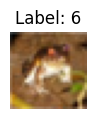

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize =(1,1))
plt.imshow(img_numpy)
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [20]:
# to compute mean and std of the images for normalization
loader = DataLoader(dataset = train_dataset, batch_size = 60000, shuffle = True)

In [21]:
loader = DataLoader(train_dataset, 60000, True)

In [12]:
sample = train_dataset[0]

In [22]:
for images, labels in loader:
    mean_train = images.mean()
    std_train = images.std()
    

In [23]:
mean_train


tensor(0.4734)

In [19]:
mean_train = 0.1307

In [24]:
std_train


tensor(0.2516)

In [21]:
std_train = 0.3081

In [25]:
transform = transforms.Compose([transforms.Pad(4), transforms.RandomHorizontalFlip(),transforms.RandomCrop(32),transforms.ToTensor(), transforms.Normalize((mean_train,),(std_train,))])

In [27]:
train_dataset = datasets.CIFAR10(root ='./data',train = True, transform = transform, download = False)

In [25]:
# Visualize the datasets

In [28]:
len(train_dataset)

50000

In [29]:
# Convert to batch
train_load = DataLoader(dataset = train_dataset, batch_size = 100, shuffle = True)


In [30]:
test_load = DataLoader(dataset = test_dataset, batch_size = 100, shuffle = True)

In [31]:
len(train_load)

500

In [42]:
# Building the CNN
class ResNet(nn.Module):
    def __init__(self):
        super().__init__()
        ##### ##### Input Block
        self.cnn = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size =3, stride =1, padding =1)
        self.batchnorm = nn.BatchNorm2d(16)
        self.relu = nn.ReLU()  # Image size is 32 x 32 x 16 , 16 channels
        # nn.ReLU(x)
       ############### Layer 1  CNN _ L_B_C
        self.cnn_1_1_1 = nn.Conv2d(in_channels =16 , out_channels =16, kernel_size =3, stride =1, padding =1)
        self.batchnorm_1_1_1 = nn.BatchNorm2d(16)
        self.cnn_1_1_2 = nn.Conv2d(in_channels =16 , out_channels =16, kernel_size =3, stride =1, padding =1)
        self.batchnorm_1_1_2 = nn.BatchNorm2d(16)
        self.cnn_1_2_1 = nn.Conv2d(in_channels =16 , out_channels =16, kernel_size =3, stride =1, padding =1)
        self.batchnorm_1_2_1 = nn.BatchNorm2d(16)
        self.cnn_1_2_2 = nn.Conv2d(in_channels =16 , out_channels =16, kernel_size =3, stride =1, padding =1)
        self.batchnorm_1_2_2 = nn.BatchNorm2d(16)
           ############### Layer 2  CNN _ L_B_C
        self.cnn_2_r = nn.Conv2d(in_channels =16 , out_channels =32, kernel_size =3, stride =2, padding =1)
        self.batchnorm_2_r = nn.BatchNorm2d(32) # residual connection  
        self.cnn_2_1_1 = nn.Conv2d(in_channels =16 , out_channels =32, kernel_size =3, stride =2, padding =1)
        self.batchnorm_2_1_1 = nn.BatchNorm2d(32)  # 16 x 16
        self.cnn_2_1_2 = nn.Conv2d(in_channels =32 , out_channels =32, kernel_size =3, stride =1, padding =1)
        self.batchnorm_2_1_2 = nn.BatchNorm2d(32)
        self.cnn_2_2_1 = nn.Conv2d(in_channels =32 , out_channels =32, kernel_size =3, stride =1, padding =1)
        self.batchnorm_2_2_1 = nn.BatchNorm2d(32)
        self.cnn_2_2_2 = nn.Conv2d(in_channels =32 , out_channels =32, kernel_size =3, stride =1, padding =1)
        self.batchnorm_2_2_2 = nn.BatchNorm2d(32)
         ############### Layer 3  CNN _ L_B_C
        self.cnn_3_r = nn.Conv2d(in_channels =32 , out_channels =64, kernel_size =3, stride =2, padding =1)
        self.batchnorm_2_r = nn.BatchNorm2d(64) # residual connection
        self.cnn_2_1_1 = nn.Conv2d(in_channels =32 , out_channels =64, kernel_size =3, stride =2, padding =1)
        self.batchnorm_2_1_1 = nn.BatchNorm2d(32)  # Image size  8 x 8 x 64 
        self.cnn_2_1_2 = nn.Conv2d(in_channels =64 , out_channels =64, kernel_size =3, stride =1, padding =1)
        self.batchnorm_2_1_2 = nn.BatchNorm2d(32)
        self.cnn_2_2_1 = nn.Conv2d(in_channels =64 , out_channels =64, kernel_size =3, stride =1, padding =1)
        self.batchnorm_2_2_1 = nn.BatchNorm2d(32)
        self.cnn_2_2_2 = nn.Conv2d(in_channels =64 , out_channels =64, kernel_size =3, stride =1, padding =1)
        self.batchnorm_2_2_2 = nn.BatchNorm2d(32)
 
          ############### 
        self.avgpool = nn.AvgPool2d(kernel_size = 8)
        self.fc = nn.Linear(64,10)

    def forward(self,x):
        out = self.cnn(x)
        out = self.batchnorm(out)
        out =self.relu(out)
        residual = out  # Residual path 1_1
        out = self.cnn_1_1_1(out)
        out = self.batchnorm_1_1_1(out)
        out = self.relu(out)   # Layer 1, Block 1 , conv 1
        out = residual + out
        out = self.cnn_1_1_2(out)
        out = self.batchnorm_1_1_2(out)
        out = self.relu(out)   # Layer 1, Block 1 , conv 1
        
        
        return out
        
        
        
        

In [43]:
model = CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)

In [44]:
correct = 0
iteration =0 
# Understand whats happending in one iteration
for i,(inputs,labels) in enumerate(train_load):
    print("For one iteration what happens")
    print ("Input shape" , inputs.shape)
    print("Labels shape", labels.shape)
    output = model(inputs)
    loss = loss_fn(output, labels)
    print("Output shape", output.shape)
    print("loss function", loss.shape)
    x,predicted = torch.max(output,1)
    print("predicted shape", predicted.shape)
    print("predicted tensor")
    print(predicted)
    correct += (predicted == labels).sum()
    print("The number of correct predictions in one batch")
    print(correct)
    print("labels")
    print(labels)
    break

For one iteration what happens
Input shape torch.Size([100, 1, 28, 28])
Labels shape torch.Size([100])
Output shape torch.Size([100, 10])
loss function torch.Size([])
predicted shape torch.Size([100])
predicted tensor
tensor([8, 8, 8, 8, 8, 8, 7, 0, 7, 7, 7, 7, 8, 8, 8, 7, 8, 2, 8, 7, 7, 0, 7, 8,
        7, 8, 0, 7, 7, 8, 7, 7, 8, 8, 2, 7, 7, 4, 8, 8, 7, 4, 8, 8, 0, 4, 8, 8,
        8, 7, 7, 8, 7, 8, 7, 8, 4, 7, 8, 7, 7, 8, 8, 8, 8, 8, 7, 8, 8, 0, 7, 7,
        7, 8, 8, 8, 7, 8, 8, 0, 7, 8, 7, 8, 7, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 8])
The number of correct predictions in one batch
tensor(7)
labels
tensor([2, 2, 9, 0, 9, 2, 5, 1, 2, 5, 7, 5, 2, 2, 3, 7, 7, 1, 7, 8, 7, 1, 3, 2,
        6, 5, 7, 7, 4, 7, 8, 9, 2, 2, 6, 6, 4, 9, 7, 3, 5, 7, 6, 2, 1, 8, 2, 2,
        3, 5, 0, 3, 1, 4, 9, 0, 1, 8, 5, 7, 5, 5, 4, 6, 5, 8, 8, 3, 3, 1, 0, 5,
        4, 5, 2, 7, 0, 6, 3, 5, 0, 3, 6, 6, 0, 5, 1, 3, 0, 7, 5, 0, 1, 4, 3, 0,
        9, 0, 2, 4])


In [45]:
loss

tensor(2.3445, grad_fn=<NllLossBackward0>)

In [46]:
# Train CNN network
num_epochs = 10
train_loss = []
train_acc = []

for epoch in range(num_epochs):
    iterations = 0
    iter_loss = 0
    correct = 0
    model.train()  # sets the CNN in training mode
    for i,(inputs,labels) in enumerate(train_load):
        output = model(inputs)
        loss = loss_fn(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _,predicted = torch.max(output,1)
        correct += (predicted == labels).sum().item()
        iter_loss += loss.item()
        iterations +=1
    train_loss.append(iter_loss/iterations)
    train_acc.append(correct/len(train_dataset))
    print("Epoch {}/{}, Training_loss: {:.3f}, Trainin_Accuracy: {:.3f}" .format(epoch+1, num_epochs, train_loss[-1],train_acc[-1]))
    
    

Epoch 1/10, Training_loss: 0.384, Trainin_Accuracy: 0.929
Epoch 2/10, Training_loss: 0.058, Trainin_Accuracy: 0.983
Epoch 3/10, Training_loss: 0.042, Trainin_Accuracy: 0.987
Epoch 4/10, Training_loss: 0.036, Trainin_Accuracy: 0.989
Epoch 5/10, Training_loss: 0.030, Trainin_Accuracy: 0.991
Epoch 6/10, Training_loss: 0.028, Trainin_Accuracy: 0.991
Epoch 7/10, Training_loss: 0.027, Trainin_Accuracy: 0.992
Epoch 8/10, Training_loss: 0.022, Trainin_Accuracy: 0.993
Epoch 9/10, Training_loss: 0.022, Trainin_Accuracy: 0.993
Epoch 10/10, Training_loss: 0.019, Trainin_Accuracy: 0.994


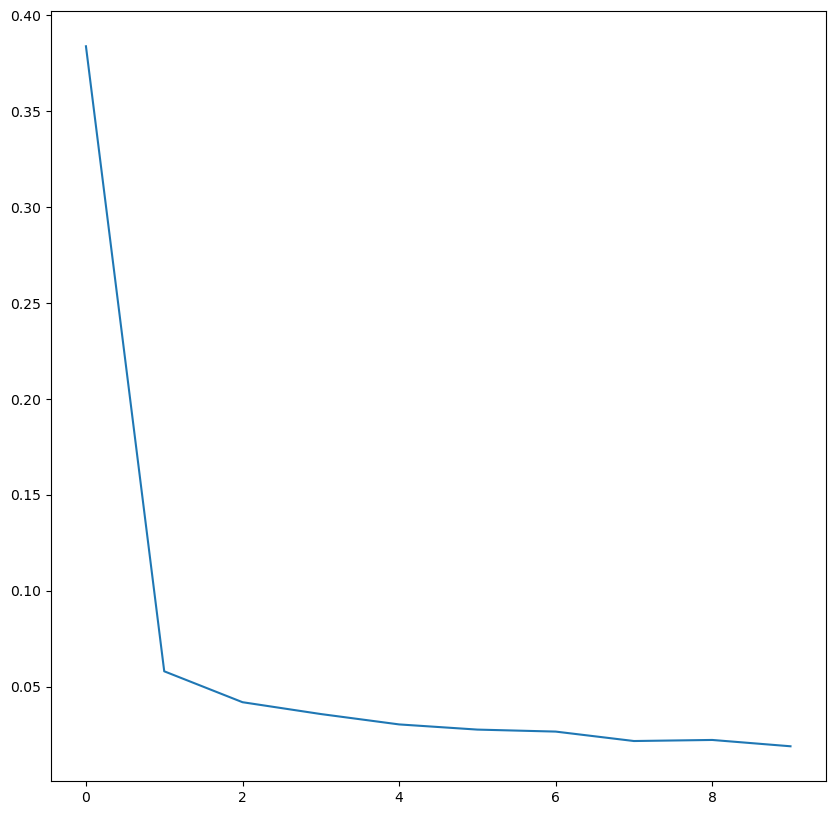

In [47]:
# Plotting the training loss and accuracy
f = plt.figure(figsize = (10,10))
plt.plot(train_loss, label = "Training Loss")

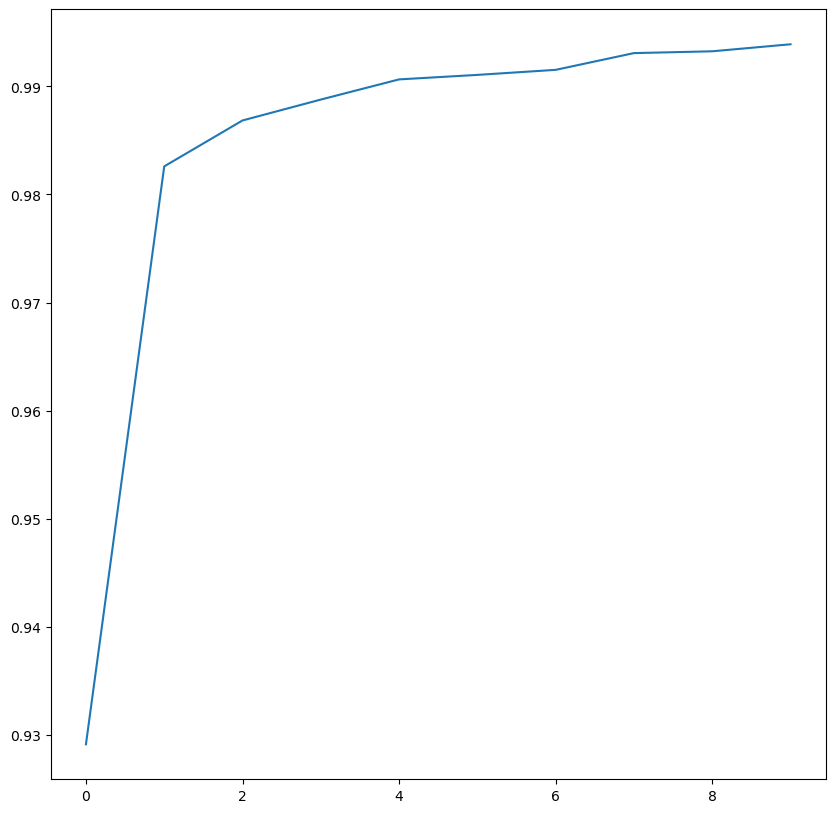

In [48]:
# plotting the accuracy
f = plt.figure(figsize =(10,10))
plt.plot(train_acc, label ="Training Accuracy")

In [49]:
# Testing CNN
iter_loss = 0
test_acc = 0
iterations = 0
correct = 0
model.eval()
for i,(inputs,labels) in enumerate(test_load):
    output = model(inputs)
    loss = loss_fn(output,labels)
    iter_loss += loss.item()
    x,predicted = torch.max(output,1)
    correct += (predicted == labels).sum().item()
    iterations +=1
test_loss = iter_loss/iterations
test_acc = 100*(correct/len(test_dataset))
print("Test Loss: {:.3f}, Test Accuracy: {:.3f}" .format(test_loss,test_acc))    
   

Test Loss: 0.046, Test Accuracy: 98.800


In [50]:
for i,(inputs,labels) in enumerate(test_load):
    print("For one iteration what happens")
    print ("Input shape" , inputs.shape)
    print("Labels shape", labels.shape)
    output = model(inputs)
    loss = loss_fn(output, labels)
    print("Output shape", output.shape)
    print("loss function", loss.shape)
    x,predicted = torch.max(output,1)
    print("predicted shape", predicted.shape)
    print("predicted tensor")
    print(predicted)
    correct += (predicted == labels).sum()
    print("The number of correct predictions in one batch")
    print(correct)
    print("labels")
    print(labels)
    break

For one iteration what happens
Input shape torch.Size([100, 1, 28, 28])
Labels shape torch.Size([100])
Output shape torch.Size([100, 10])
loss function torch.Size([])
predicted shape torch.Size([100])
predicted tensor
tensor([2, 1, 8, 5, 0, 9, 8, 3, 8, 1, 4, 2, 1, 9, 0, 4, 8, 3, 3, 9, 7, 2, 0, 4,
        7, 8, 6, 7, 1, 1, 4, 5, 1, 1, 2, 3, 5, 0, 5, 3, 5, 1, 7, 2, 1, 2, 7, 0,
        2, 7, 9, 0, 7, 1, 3, 9, 9, 9, 6, 9, 6, 0, 3, 4, 5, 3, 7, 1, 6, 8, 9, 5,
        8, 2, 5, 6, 9, 4, 2, 1, 7, 4, 0, 7, 7, 0, 2, 8, 3, 0, 1, 0, 4, 2, 0, 0,
        8, 0, 1, 5])
The number of correct predictions in one batch
tensor(9979)
labels
tensor([2, 1, 8, 5, 0, 9, 8, 3, 8, 2, 4, 2, 1, 9, 0, 4, 8, 3, 3, 9, 7, 2, 0, 4,
        7, 8, 6, 7, 1, 1, 4, 5, 1, 1, 2, 3, 5, 0, 5, 3, 5, 1, 7, 2, 1, 2, 7, 0,
        2, 7, 9, 0, 7, 1, 3, 9, 9, 9, 6, 9, 6, 0, 3, 4, 5, 3, 7, 1, 6, 8, 9, 5,
        8, 2, 5, 6, 9, 4, 2, 1, 7, 4, 0, 7, 7, 0, 2, 8, 3, 0, 1, 0, 4, 2, 0, 0,
        8, 0, 1, 5])


In [51]:
# Image Prediction
image_sample = test_dataset[20]
image = image_sample[0].reshape([1,1,28,28])
label = image_sample[1]
model.eval()
output = model(image)
_,predicted = torch.max(output,1)
print("Predicted Digit is: {}" .format(predicted.item()))
print("Actual Digit is:{}" .format(label))

Predicted Digit is: 9
Actual Digit is:9


In [52]:
import cv2
import torch
from PIL import Image

In [78]:
transforms_photo = transforms.Compose([transforms.Resize([28,28]),transforms.ToTensor(), transforms.Normalize(mean_train,std_train)])

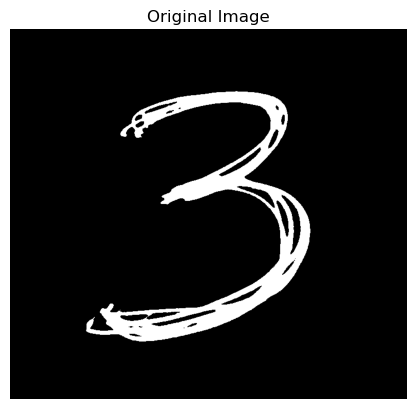

In [64]:
image = cv2.imread("3.jpg",0)
ret, thresholded = cv2.threshold(image,100,255,cv2.THRESH_BINARY)
img = 255-thresholded
plt.imshow(img, cmap ='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()


In [65]:
def predict(image_name,model):
    image = cv2.imread(img_name,0)
    ret, thresholded = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    img = 255-thresholded
    img = Image.fromarray(img)
    img = transforms_photo(img)
    img = img.view(1,1,28,28)
    #img = Variable(img)
    model.eval()
    output = model(img)
    print(output)
    print(output.data)
    x,predicted = torch.max(output,1)
    return predicted.item()

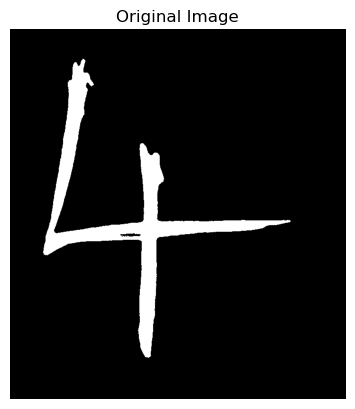

tensor([[-8.1703, -0.0641, -6.1773, -6.9425,  5.8189,  0.9590,  4.5569, -9.6870,
          0.7413, -3.5301]], grad_fn=<AddmmBackward0>)
tensor([[-8.1703, -0.0641, -6.1773, -6.9425,  5.8189,  0.9590,  4.5569, -9.6870,
          0.7413, -3.5301]])
The predicted label is: 4


In [85]:
image = cv2.imread("4a.jpg",0)
ret, thresholded = cv2.threshold(image,100,255,cv2.THRESH_BINARY)
img = 255-thresholded
plt.imshow(img, cmap ='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()
img = Image.fromarray(img)
img = transforms_photo(img)
img = img.view(1,1,28,28)
    #img = Variable(img)
model.eval()
output = model(img)
print(output)
print(output.data)
x,predicted = torch.max(output,1)
print("The predicted label is: {}" .format(predicted.item()))

In [74]:
img.shape


torch.Size([1, 128, 128])